<a href="https://colab.research.google.com/github/AbrahamMotaGomez/ChallengeAluraStoreLATAMAB/blob/main/inmuebles_cdmx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
url="https://gist.githubusercontent.com/ahcamachod/a572cfcc2527046db93101f88011b26e/raw/ffb13f45a79d31223e645611a119397dd127ee3c/alquiler.csv"
datos=pd.read_csv(url, delimiter=";")
datos.head(7)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
5,Casa de Condominio,Santa Fe,5,4,5,750,77000.0,NaN,NaN
6,Conjunto Comercial/Sala,Centro Histórico,0,3,0,695,122500.0,67175.5,10605.0


In [3]:
### Al recibir un DataSet se debe corroborar su tamaño ###

datos.shape

(25121, 9)

In [4]:
datos.columns

Index(['Tipo', 'Colonia', 'Habitaciones', 'Garages', 'Suites', 'Area', 'Valor',
       'Condominio', 'Impuesto'],
      dtype='object')

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25121 entries, 0 to 25120
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo          25121 non-null  object 
 1   Colonia       25121 non-null  object 
 2   Habitaciones  25121 non-null  int64  
 3   Garages       25121 non-null  int64  
 4   Suites        25121 non-null  int64  
 5   Area          25121 non-null  int64  
 6   Valor         25107 non-null  float64
 7   Condominio    22495 non-null  float64
 8   Impuesto      18037 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


In [6]:
pd.unique(datos["Tipo"])

array(['Cocineta', 'Casa', 'Conjunto Comercial/Sala', 'Departamento',
       'Casa de Condominio', 'Edificio Completo', 'Departamento en Hotel',
       'Tienda/Salón', 'Casa Comercial', 'Casa de Vecindad',
       'Terreno Estándar', 'Cochera/Estacionamiento', 'Loft',
       'Galpón/Depósito/Almacén', 'Tienda en Centro Comercial', 'Rancho',
       'Posada/Chalé', 'Estudio', 'Hotel', 'Loteo/Condominio',
       'Industria'], dtype=object)

In [7]:
datos.describe()

,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
count,25121.000000,25121.000000,25121.000000,25121.000000,2.510700e+04,2.249500e+04,1.803700e+04
mean,1.748856,1.798655,0.656781,220.885076,3.688505e+04,9.528676e+03,4.436513e+03
std,1.811131,22.906129,1.083180,817.465428,3.669381e+05,1.547102e+05,2.283381e+04
min,0.000000,0.000000,0.000000,0.000000,3.150000e+02,3.500000e+00,3.500000e+00
25%,0.000000,0.000000,0.000000,55.000000,5.600000e+03,2.275000e+03,4.270000e+02
50%,2.000000,1.000000,0.000000,90.000000,1.137500e+04,4.056500e+03,1.008000e+03
75%,3.000000,2.000000,1.000000,180.000000,2.695000e+04,7.350000e+03,2.625000e+03
max,100.000000,1966.000000,24.000000,42000.000000,5.250000e+07,2.293400e+07,1.577188e+06


In [9]:
datos["Valor"].mean()

np.float64(36885.05048392878)

In [17]:
df_precio=datos.groupby("Tipo")[["Valor"]].mean().sort_values("Valor")

<Axes: ylabel='Tipo'>

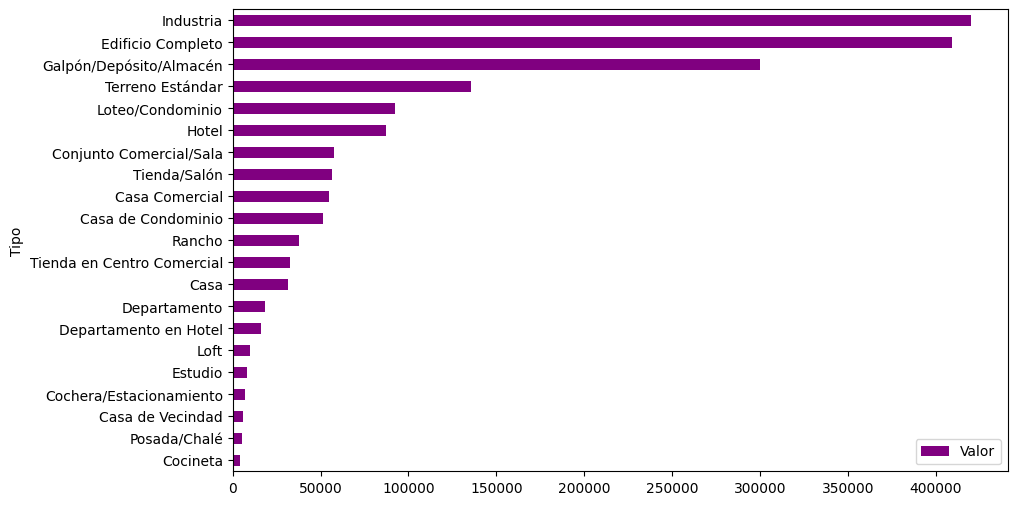

In [18]:
df_precio.plot(kind="barh",figsize=(10,6),color="purple")

In [19]:
datos.Tipo.unique()

array(['Cocineta', 'Casa', 'Conjunto Comercial/Sala', 'Departamento',
       'Casa de Condominio', 'Edificio Completo', 'Departamento en Hotel',
       'Tienda/Salón', 'Casa Comercial', 'Casa de Vecindad',
       'Terreno Estándar', 'Cochera/Estacionamiento', 'Loft',
       'Galpón/Depósito/Almacén', 'Tienda en Centro Comercial', 'Rancho',
       'Posada/Chalé', 'Estudio', 'Hotel', 'Loteo/Condominio',
       'Industria'], dtype=object)

In [26]:
imuebles=['Conjunto Comercial/Sala',  'Edificio Completo',
       'Tienda/Salón',  'Cochera/Estacionamiento',
       'Galpón/Depósito/Almacén', 'Tienda en Centro Comercial',
       'Hotel', 'Loteo/Condominio',
       'Industria', "Casa Comercial"]

rentas=datos.query("@imuebles not in Tipo")
rentas.head()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
5,Casa de Condominio,Santa Fe,5,4,5,750,77000.0,NaN,NaN


<Axes: ylabel='Tipo'>

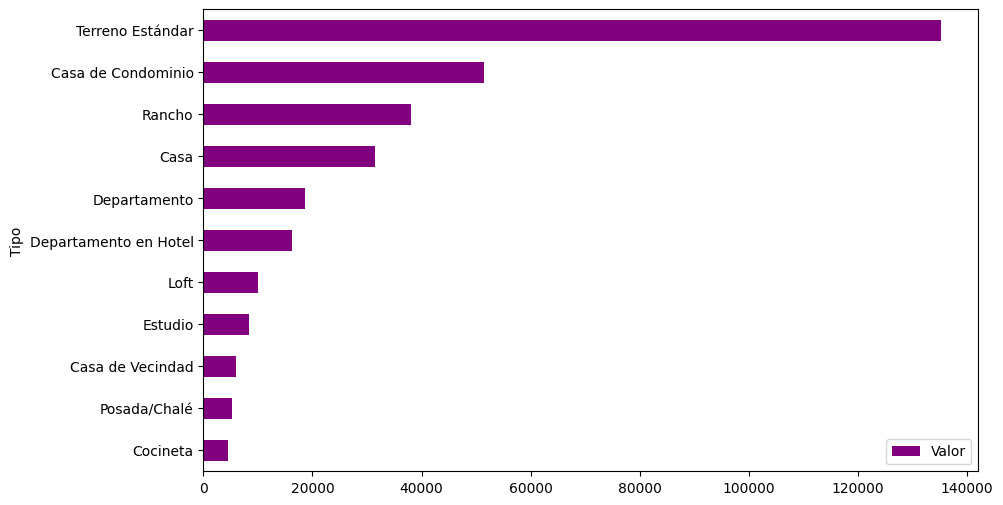

In [27]:
df_precio=rentas.groupby("Tipo")[["Valor"]].mean().sort_values("Valor")
df_precio.plot(kind="barh",figsize=(10,6),color="purple")

In [34]:
porc_tipo=rentas.Tipo.value_counts(normalize=True).to_frame()
rentas.query("Tipo=='Departamento'")

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
7,Departamento,Centro Histórico,1,0,0,36,4200.0,NaN,NaN
8,Departamento,Condesa,1,0,1,40,7000.0,1963.5,175.0
10,Departamento,Condesa,4,3,1,243,45500.0,7000.0,2810.5
...,...,...,...,...,...,...,...,...,...
25111,Departamento,Lomas de Chapultepec,3,0,1,80,10500.0,3535.0,871.5
25113,Departamento,Coyoacán,3,1,2,150,52500.0,4900.0,2100.0
25114,Departamento,Narvarte,1,0,0,28,3500.0,1260.0,87.5
25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5


array([<Axes: ylabel='proportion'>], dtype=object)

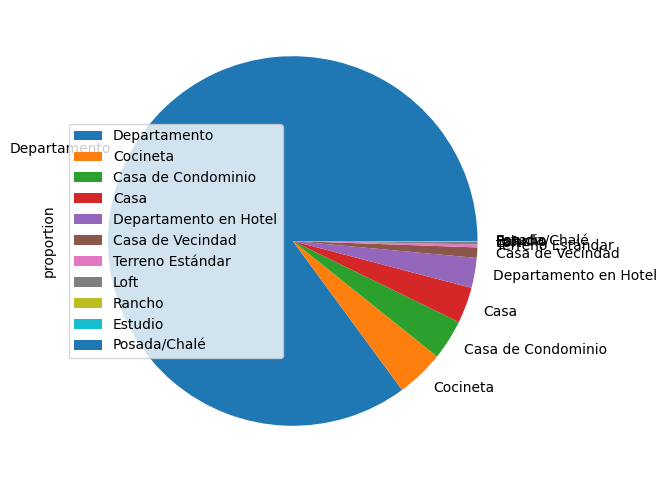

In [37]:
porc_tipo.plot(kind="pie",figsize=(10,6),legend="Tipo", subplots=True)

In [47]:
dep=rentas.query("Tipo=='Departamento'")
dep.Habitaciones.mean()
dep.head()



,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
7,Departamento,Centro Histórico,1,0,0,36,4200.0,NaN,NaN
8,Departamento,Condesa,1,0,1,40,7000.0,1963.5,175.0
10,Departamento,Condesa,4,3,1,243,45500.0,7000.0,2810.5


<Axes: ylabel='Colonia'>

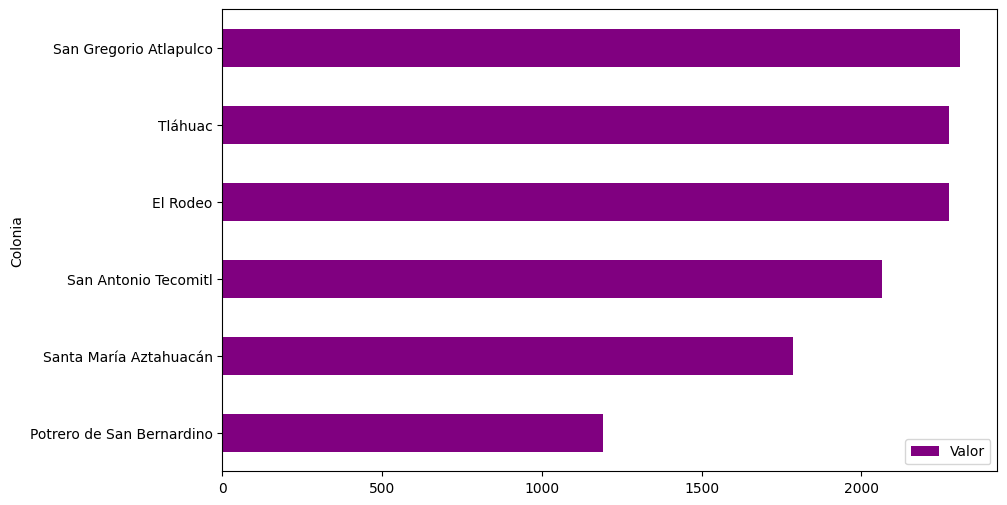

In [51]:
dep_colonia=dep.groupby("Colonia")[["Valor"]].mean().sort_values("Valor").head(6)
dep_colonia.plot(kind="barh",figsize=(10,6),color="purple")